In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [2]:

filename = 'glass.data.csv'

names = np.arange(11)
#raw_data = open(filename, 'rt')
data = pd.read_csv(filename, names=names)
data = data.loc[:,1:10]

features = data.loc[:,1:9]
target = data.loc[:,10]
print(features.size)
correlation = data.corr('pearson')
(correlation[10].sort_values())


1926


3    -0.744993
9    -0.188278
1    -0.164237
6    -0.010054
7     0.000952
5     0.151565
2     0.502898
8     0.575161
4     0.598829
10    1.000000
Name: 10, dtype: float64

In [3]:


features = (features-features.min()) / (features.max()-features.min())
features.shape

(214, 9)

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(features,target, test_size=0.3)

In [5]:
xtrain.shape

(149, 9)

In [6]:
xtest.shape

(65, 9)

In [7]:
f1 = 3
f2 = 4

basex = np.array(xtrain[[f1,f2]])
basey = np.array(ytrain)

xtest = np.array(xtest[[f1,f2]])
ytest = np.array(ytest)


(149, 2) (149, 1)
[5 1 2 1 1 2 2 1 2 5 7 7 5 1 2 3 2 2 7 5 3 1 2 7 1 1 1 1 2 1 2 3 2 1 2 7 1
 1 1 7 7 1 2 3 1 3 7 3 7 3 6 1 7 7 7 1 1 2 6 7 1 2 2 6 2 2 2 3 2 2 1 2 2 1
 2 3 2 1 2 1 2 2 5 6 1 5 1 7 2 1 2 2 6 7 2 2 1 2 7 2 3 1 2 3 2 5 1 1 2 2 1
 7 1 1 6 5 2 2 2 2 5 1 1 7 1 2 2 1 2 2 1 1 7 7 5 2 3 1 7 1 7 7 2 2 7 2 1 2
 1]


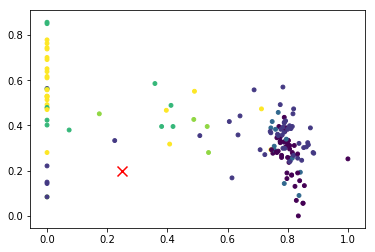

In [26]:
x = pd.DataFrame(basex)
y = pd.DataFrame(basey)
print(x.shape,y.shape)
print(np.ravel(np.array(y)))

plt.scatter(x.iloc[:,0], x.iloc[:,1],c=np.ravel(np.array(y)), s=15)
plt.scatter(0.25, 0.2, c='r', marker='x', s=100)


In [9]:
k= np.sqrt(len(x))
k

12.206555615733702

In [10]:
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)

In [11]:
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances


In [12]:
def get_neighbours(distances, count):
    return distances[:count]


In [13]:
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 7)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction

In [14]:
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [15]:
print(accuracy(basex,basey,xtest,ytest))


Accuracy: 63.07692307692308%
